# Analysis of Contact Tracing Applications

In [1]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tracking import config, utils

In [15]:
sns.set()

## Loading data

In [10]:
df_apps = pd.read_csv(config.data / 'project-data - all-apps.csv')

In [11]:
df_apps

,name,country,links,platform,data_type,bluetooth,gps,centralized,status,data_storage,...,central_id_storage,data_persistence_days,government,contact_trace_aid,opt_in,open_source,encryption,covid_positive_verification,quarantine_enforcement,notes
0,COVIDSafe,Australia,https://www.health.gov.au/resources/apps-and-t...,mobile app,bluetooth,yes,no,NaN,NaN,local,...,yes,21,yes,yes,yes,yes,yes,test,NaN,based on TraceTogether
1,Coronavirus Australia,Australia,health.gov.au,mobile app,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN
2,Stopp Corona,Austria,https://www.roteskreuz.at/site/faq-app-stopp-c...,mobile app,bluetooth,yes,no,NaN,NaN,local,...,no,14,yes,yes,yes,NaN,yes,NaN,NaN,NaN
3,BeAware,Bahrain,https://play.google.com/store/apps/details?id=...,mobile app,gps + bluetooth,yes,yes,yes,released,central,...,yes,14,yes,yes,yes,no,NaN,test,yes,NaN
4,ViruSafe,Bulgaria,https://play.google.com/store/apps/details?id=...,mobile app,gps + bluetooth,yes,yes,NaN,NaN,NaN,...,yes,NaN,yes,yes,yes,yes,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Proximity,Italy,https://arxiv.org/abs/2003.10222,mobile app,bluetooth,yes,no,NaN,proposal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
91,Safe2,United States,https://safe2.org/,mobile app,gps + bluetooth,yes,yes,NaN,development,NaN,...,NaN,NaN,no,NaN,NaN,NaN,NaN,self,NaN,NaN
92,Unmaze,Bulgaria,http://cyborgsys.com/unmaze/,mobile app,gps + bluetooth,yes,yes,NaN,released,NaN,...,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,Coalition,France,http://CoalitionNetwork.org,mobile app,bluetooth,yes,no,no,released,local,...,no,NaN,yes,yes,yes,NaN,NaN,NaN,NaN,NaN


In [12]:
df_apps = (df_apps.fillna({
    'open_source': 'no',
    'quarantine_enforcement': 'no',
    'government': 'no'
})
 .fillna('unknown'))
df_apps['notes'] = df_apps['notes'].replace('unknown', '')

In [14]:
utils.display_all_cols(df_apps)

,name,country,links,platform,data_type,bluetooth,gps,centralized,status,data_storage,linkage_method,protocol,anon_method,central_id_storage,data_persistence_days,government,contact_trace_aid,opt_in,open_source,encryption,covid_positive_verification,quarantine_enforcement,notes
0,COVIDSafe,Australia,https://www.health.gov.au/resources/apps-and-t...,mobile app,bluetooth,yes,no,unknown,unknown,local,exchange temporary ids,BlueTrace,pseudonymous,yes,21,yes,yes,yes,yes,yes,test,no,based on TraceTogether
1,Coronavirus Australia,Australia,health.gov.au,mobile app,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,yes,no,unknown,no,unknown,unknown,no,
2,Stopp Corona,Austria,https://www.roteskreuz.at/site/faq-app-stopp-c...,mobile app,bluetooth,yes,no,unknown,unknown,local,exchange temporary ids,p2pkit,pseudonymous,no,14,yes,yes,yes,no,yes,unknown,no,
3,BeAware,Bahrain,https://play.google.com/store/apps/details?id=...,mobile app,gps + bluetooth,yes,yes,yes,released,central,unknown,unknown,none,yes,14,yes,yes,yes,no,unknown,test,yes,
4,ViruSafe,Bulgaria,https://play.google.com/store/apps/details?id=...,mobile app,gps + bluetooth,yes,yes,unknown,unknown,unknown,unknown,unknown,unknown,yes,unknown,yes,yes,yes,yes,unknown,unknown,no,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Proximity,Italy,https://arxiv.org/abs/2003.10222,mobile app,bluetooth,yes,no,unknown,proposal,unknown,unknown,unknown,unknown,unknown,unknown,no,unknown,unknown,no,yes,unknown,no,
91,Safe2,United States,https://safe2.org/,mobile app,gps + bluetooth,yes,yes,unknown,development,unknown,unknown,unknown,unknown,unknown,unknown,no,unknown,unknown,no,unknown,self,no,
92,Unmaze,Bulgaria,http://cyborgsys.com/unmaze/,mobile app,gps + bluetooth,yes,yes,unknown,released,unknown,unknown,unknown,unknown,unknown,unknown,no,unknown,unknown,no,unknown,unknown,no,
93,Coalition,France,http://CoalitionNetwork.org,mobile app,bluetooth,yes,no,no,released,local,unknown,Whisper,anonymous,no,unknown,yes,yes,yes,no,unknown,unknown,no,


## Descriptive stats

In [29]:
df_apps['name'].nunique()

93

In [30]:
df_apps['country'].nunique()

46

In [33]:
df_apps['country'].value_counts()

India              15
United States      12
Germany             5
EU                  3
South Korea         3
Israel              3
unknown             3
Italy               3
Bulgaria            2
Australia           2
Turkey              2
Spain               2
Austria             2
Russia              2
Global              2
Poland              2
Czechia             2
France              2
Iran                1
Finland             1
Colombia            1
Norway              1
Belgium             1
Singapore           1
China               1
Sri Lanka           1
South Africa        1
Thailand            1
Indonesia           1
Saudi Arabia        1
Ukraine             1
Ghana               1
Switzerland         1
Philippines         1
Peru                1
Hong Kong           1
Viet Nam            1
Japan               1
Ecuador             1
Canada              1
Bahrain             1
Iceland             1
Slovakia            1
United Kingdom      1
Cyprus              1
North Mace

## Plotting

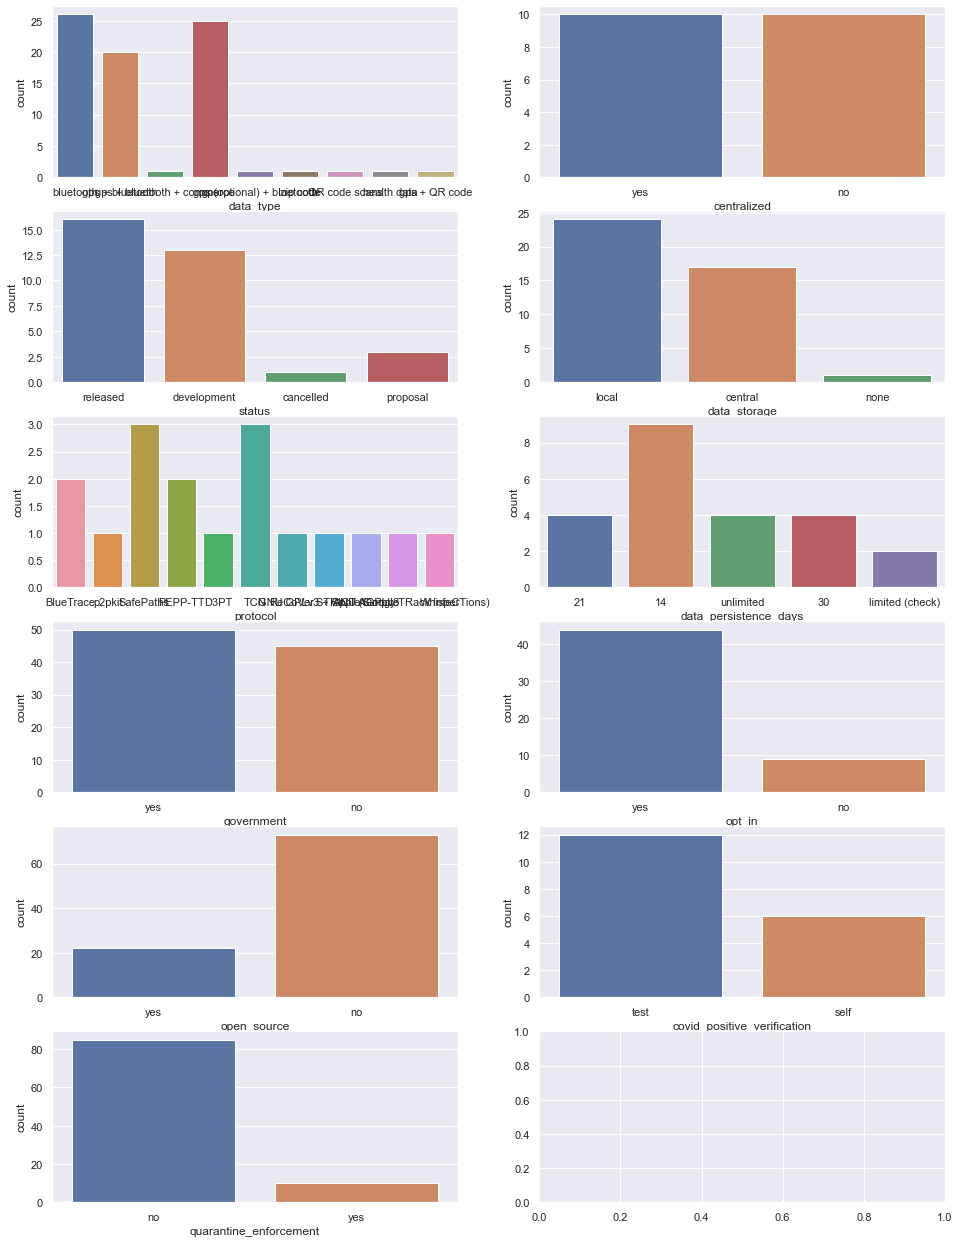

In [26]:
cols_to_plot = [
    'data_type',
    'centralized',
    'status',
    'data_storage',
    'protocol',
    'data_persistence_days',
    'government',
    'opt_in',
    'open_source',
    'covid_positive_verification',
    'quarantine_enforcement'
]
ncols = 2
width = 8
height = 4
fig, axs = plt.subplots(int(np.ceil(len(cols_to_plot) / ncols)), ncols, figsize=(ncols * width, len(cols_to_plot) / ncols * height))
for col, ax in zip(cols_to_plot, axs.flat):
    subset = df_apps.query(f'{col} != "unknown"')
    sns.countplot(x=col, data=subset, ax=ax)
plt.show()

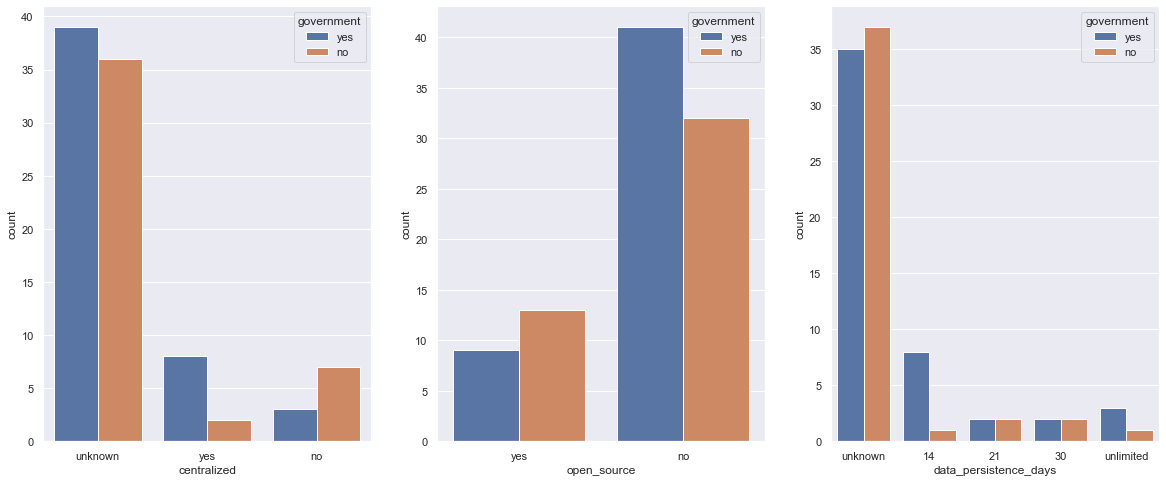

In [28]:
# Looking at government vs. different variables
day_order = ['unknown', '14', '21', '30', 'unlimited']
cols = [
    'centralized',
    'open_source',
    'data_persistence_days'
]
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
for col, ax in zip(cols, axs):
    if col == 'data_persistence_days':
        sns.countplot(x=col, ax=ax, hue='government', order=day_order, data=df_apps)
    else:
        sns.countplot(x=col, ax=ax, hue='government', data=df_apps)
plt.show()